<a href="https://colab.research.google.com/github/AKSHITHA-CHILUKA/Akshitha-GlucoSense-Infy-Nov2024/blob/main/Diabities_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/diabetes_data.csv", delimiter=";")


In [2]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [3]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

The info() output provides information about data types, non-null counts, and memory usage, helping identify potential missing values and assess the dataset’s structure.

In [4]:
print(df.describe())


              age    polyuria  polydipsia  sudden_weight_loss    weakness  \
count  520.000000  520.000000  520.000000          520.000000  520.000000   
mean    48.028846    0.496154    0.448077            0.417308    0.586538   
std     12.151466    0.500467    0.497776            0.493589    0.492928   
min     16.000000    0.000000    0.000000            0.000000    0.000000   
25%     39.000000    0.000000    0.000000            0.000000    0.000000   
50%     47.500000    0.000000    0.000000            0.000000    1.000000   
75%     57.000000    1.000000    1.000000            1.000000    1.000000   
max     90.000000    1.000000    1.000000            1.000000    1.000000   

       polyphagia  genital_thrush  visual_blurring     itching  irritability  \
count  520.000000      520.000000       520.000000  520.000000    520.000000   
mean     0.455769        0.223077         0.448077    0.486538      0.242308   
std      0.498519        0.416710         0.497776    0.500300    

describe() gives summary statistics for numerical features like age, showing mean, min, max, and quartiles, which can help you detect outliers.

In [5]:
print(df['class'].value_counts())

class
1    320
0    200
Name: count, dtype: int64


value_counts() on the target variable (class) shows the balance between classes, providing insights into whether the dataset might be imbalanced.

In [6]:

print("Data Types and Missing Values:")
print(df.dtypes.astype(str) + " | Missing: " + df.isnull().sum().astype(str))

Data Types and Missing Values:
age                    int64 | Missing: 0
gender                object | Missing: 0
polyuria               int64 | Missing: 0
polydipsia             int64 | Missing: 0
sudden_weight_loss     int64 | Missing: 0
weakness               int64 | Missing: 0
polyphagia             int64 | Missing: 0
genital_thrush         int64 | Missing: 0
visual_blurring        int64 | Missing: 0
itching                int64 | Missing: 0
irritability           int64 | Missing: 0
delayed_healing        int64 | Missing: 0
partial_paresis        int64 | Missing: 0
muscle_stiffness       int64 | Missing: 0
alopecia               int64 | Missing: 0
obesity                int64 | Missing: 0
class                  int64 | Missing: 0
dtype: object


**Univariate Analysis: Gender Distribution**

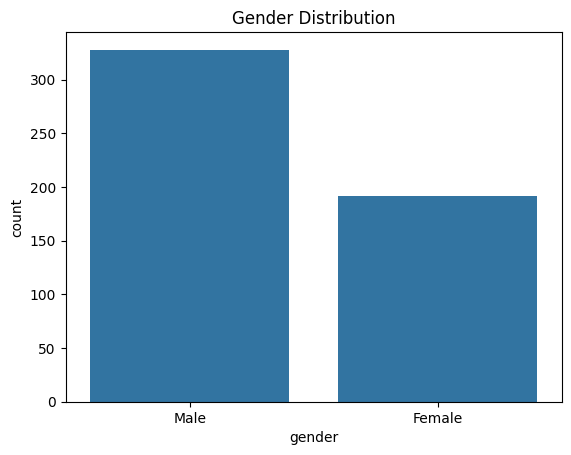

In [7]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


This bar plot shows the count of each gender in the dataset. Understanding gender distribution helps assess whether there’s a potential gender bias or imbalance, which could impact results, especially in healthcare data.

**Univariate Analysis: Age Distribution**

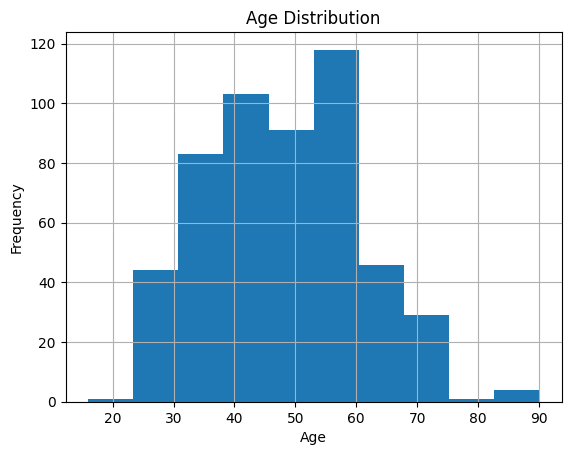

In [8]:
df['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


The histogram illustrates the distribution of ages in the dataset. This gives a sense of the dataset’s age range and helps identify if it’s skewed towards a particular age group. Age distributions are important as certain age groups may be more prone to certain health conditions.

This box plot shows the distribution of age for each class. If there’s a significant difference between the age distributions across classes, age might be a key predictor. For example, if one class tends to have a higher median age, it may indicate a correlation between age and the target variable.

**Bivariate Analysis: Polyuria vs. Class**

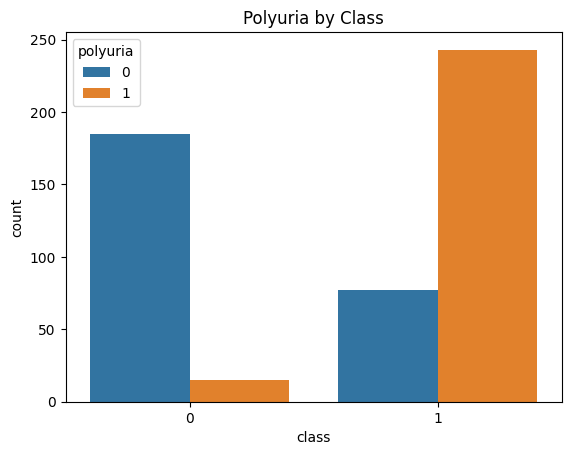

In [9]:
sns.countplot(x='class', hue='polyuria', data=df)
plt.title('Polyuria by Class')
plt.show()


The count plot shows the distribution of the polyuria feature for each class. If certain symptoms, like polyuria, are more prevalent in one class, this feature could be a strong indicator for prediction. Examining such relationships between symptoms and class can reveal critical patterns in the dataset.

**Multivariate Analysis: Pair Plot**

The pair plot allows you to visually inspect the relationships between pairs of features, with points colored by class. It helps identify separability between classes based on feature combinations, providing insights into the data's linear or nonlinear relationships.


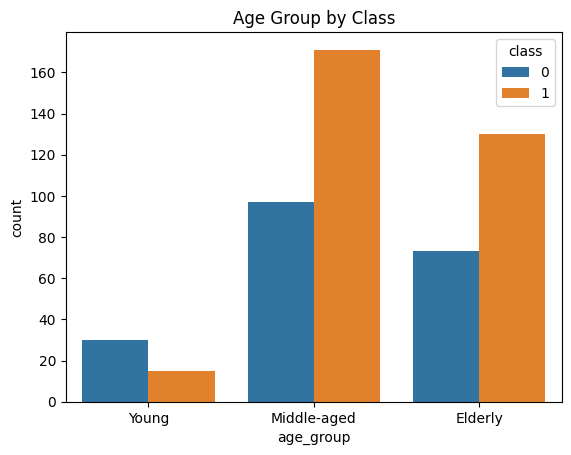

In [10]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 80], labels=['Young', 'Middle-aged', 'Elderly'])
sns.countplot(x='age_group', hue='class', data=df)
plt.title('Age Group by Class')
plt.show()


In [11]:
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']


In [12]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
X = df.drop('class', axis=1)
y = df['class']


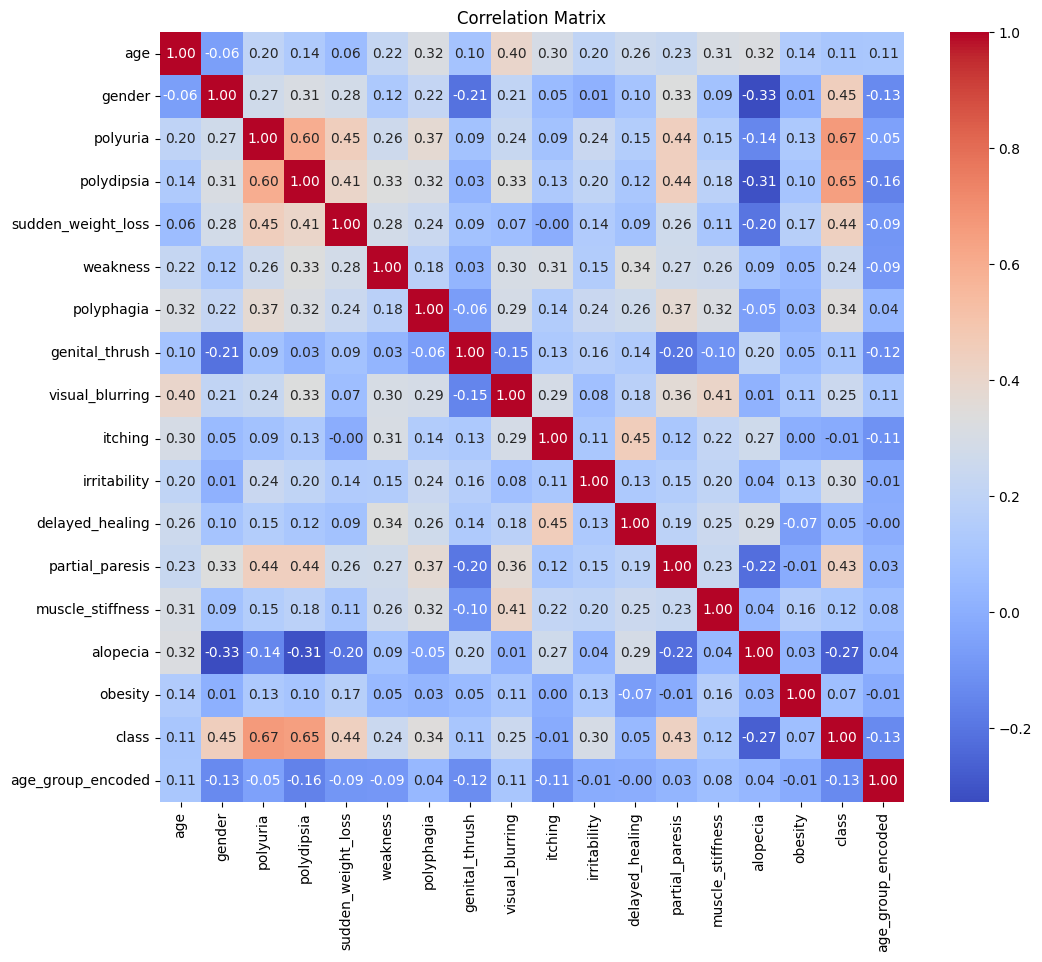

In [13]:

df['age_group_encoded'] = pd.factorize(df['age_group'])[0]
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

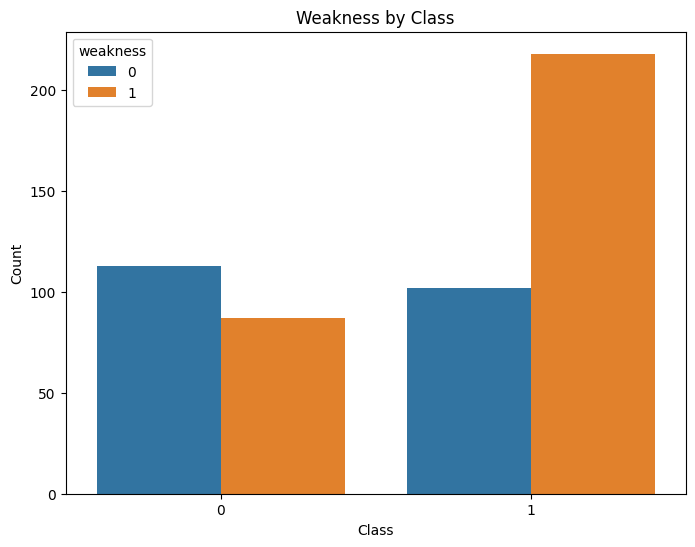

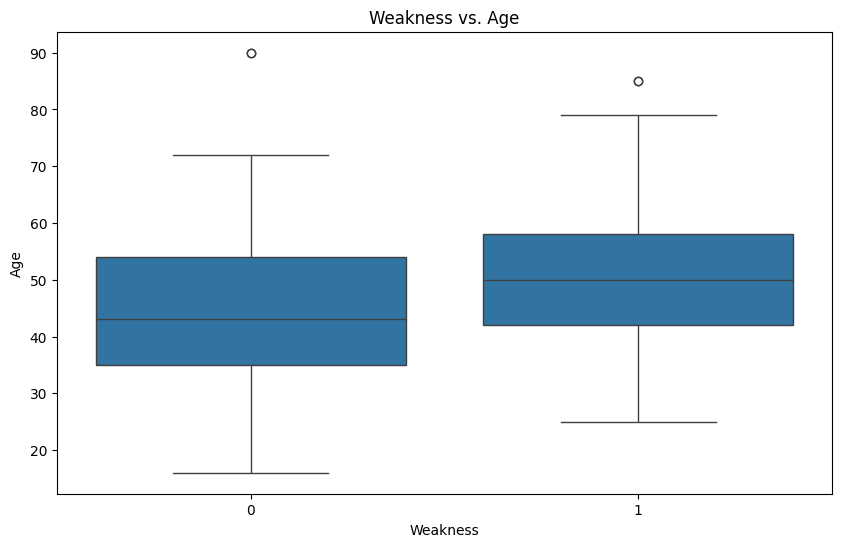

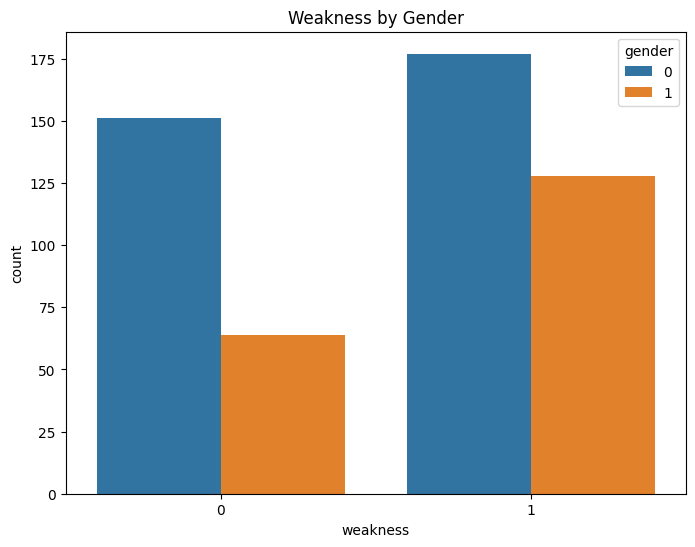

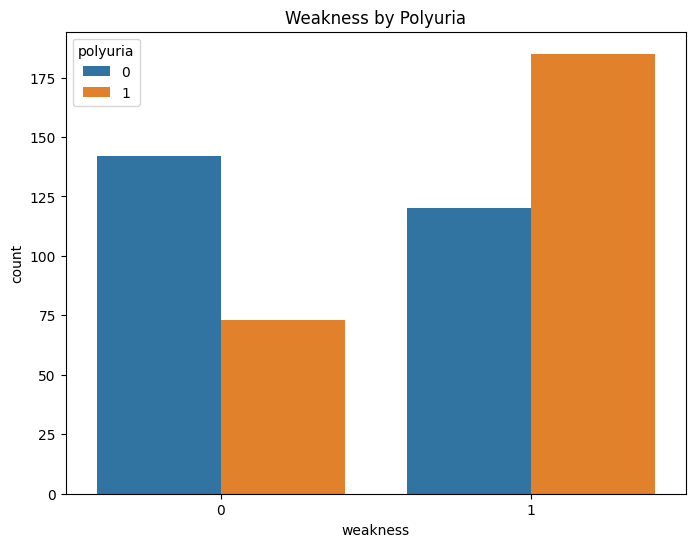

In [14]:

plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='weakness', data=df)
plt.title('Weakness by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='weakness', y='age', data=df)
plt.title('Weakness vs. Age')
plt.xlabel('Weakness')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='weakness', hue='gender', data=df)
plt.title('Weakness by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='weakness', hue='polyuria', data=df)
plt.title('Weakness by Polyuria')
plt.show()



People with weakness are more likely to have diabities


In [15]:
df[df['class'] == 'Positive']

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group,age_group_encoded


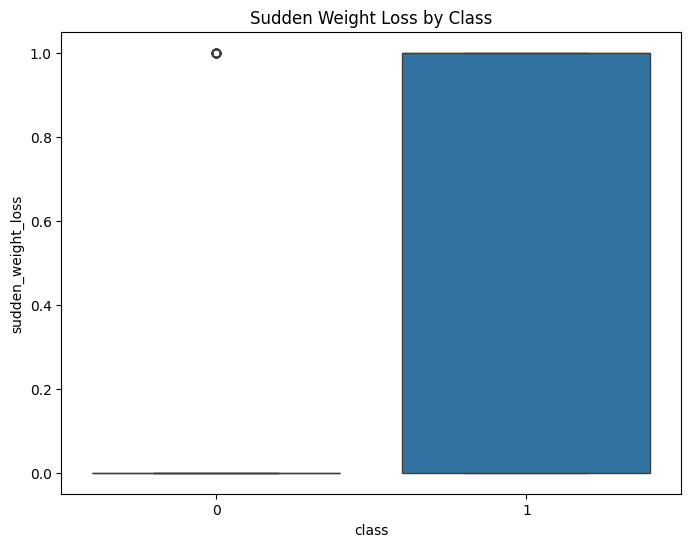

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='sudden_weight_loss', data=df)
plt.title('Sudden Weight Loss by Class')
plt.show()

people with sudden weight loss also tend to have diabities

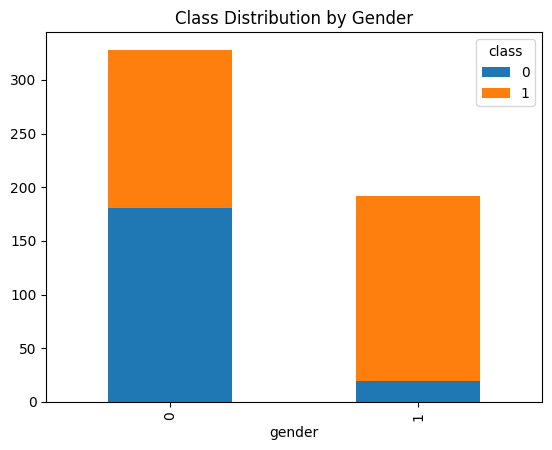

In [17]:
pd.crosstab(df['gender'], df['class']).plot(kind='bar', stacked=True)
plt.title('Class Distribution by Gender')
plt.show()


most men have diabities and women with diabities are less

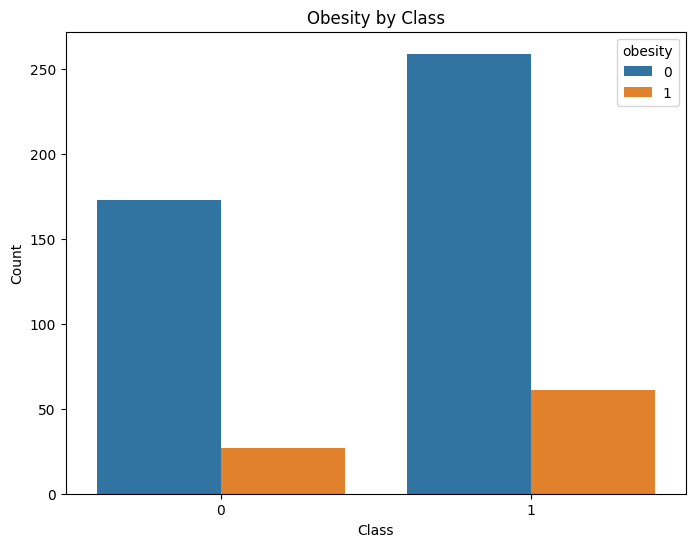

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='obesity', data=df)
plt.title('Obesity by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

obesity does not have much impact on diabities

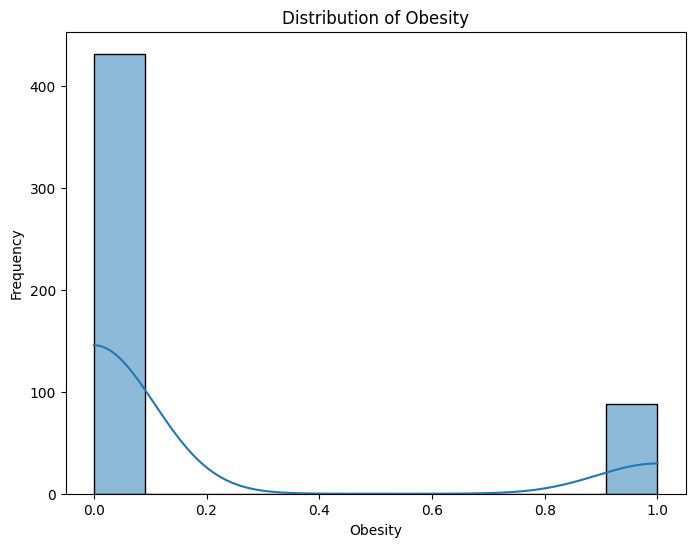

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['obesity'], kde=True)
plt.title('Distribution of Obesity')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.show()

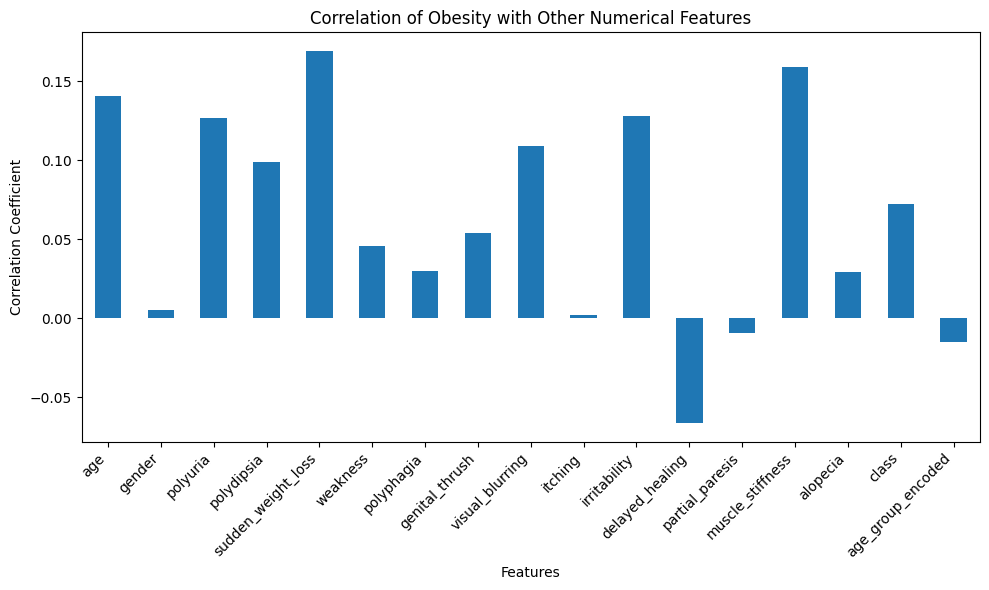

In [20]:
numerical_features = df.select_dtypes(include=np.number).columns
obesity_correlations = df[numerical_features].corr()['obesity'].drop('obesity')

plt.figure(figsize=(10, 6))
obesity_correlations.plot(kind='bar')
plt.title('Correlation of Obesity with Other Numerical Features')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

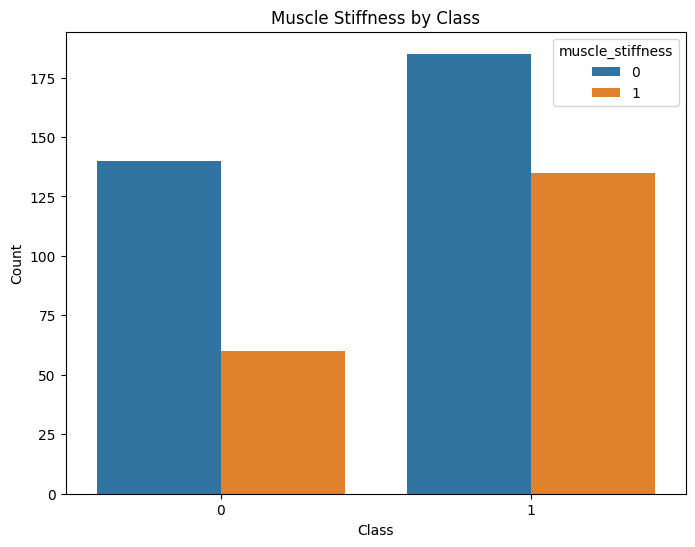

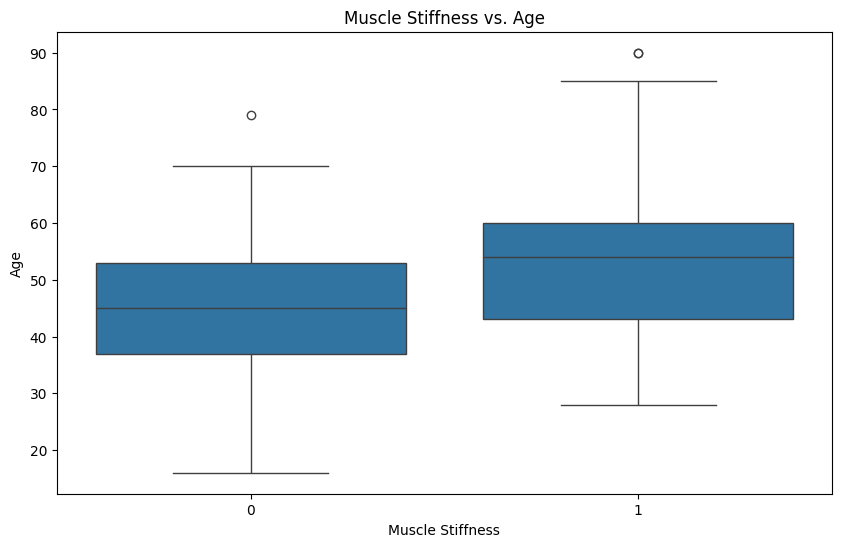

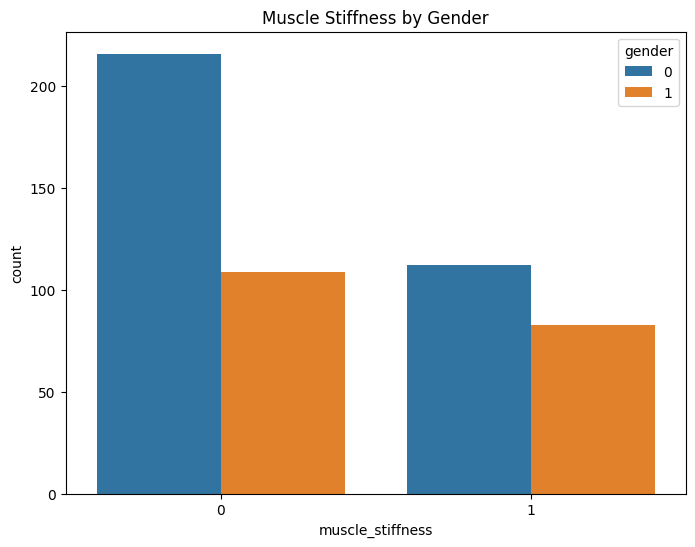

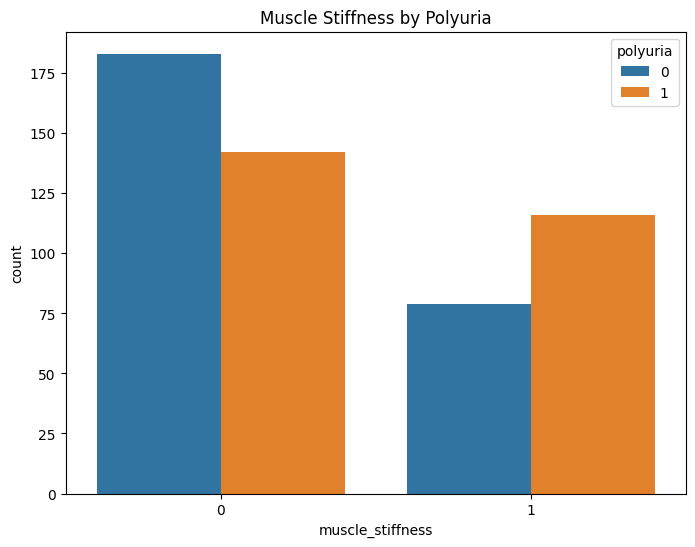

In [21]:


plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='muscle_stiffness', data=df)
plt.title('Muscle Stiffness by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='muscle_stiffness', y='age', data=df)
plt.title('Muscle Stiffness vs. Age')
plt.xlabel('Muscle Stiffness')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='muscle_stiffness', hue='gender', data=df)
plt.title('Muscle Stiffness by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='muscle_stiffness', hue='polyuria', data=df)
plt.title('Muscle Stiffness by Polyuria')
plt.show()

muscle stiffness has more impact in men rather than women

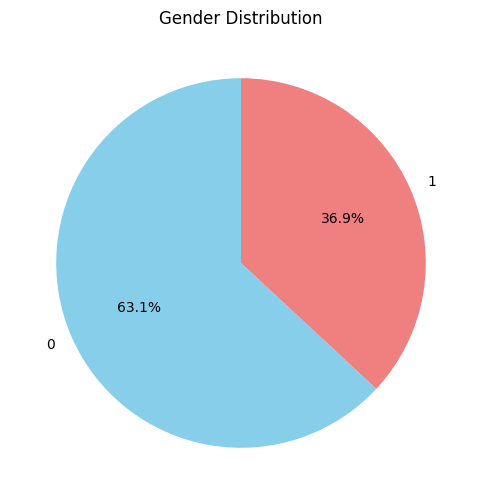

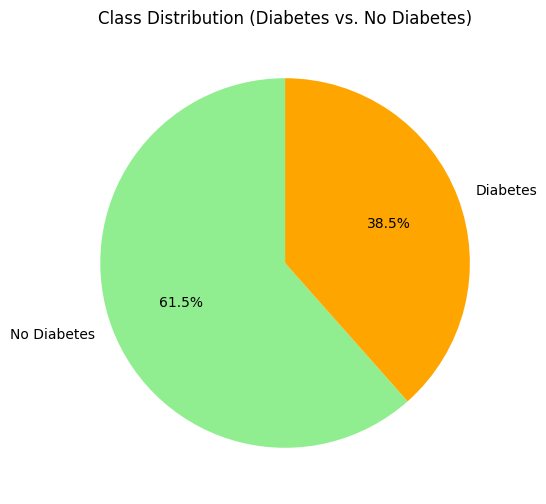

In [22]:
# Pie chart for Gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title('Gender Distribution')
plt.show()

# Pie chart for Class distribution
class_counts = df['class'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=['No Diabetes', 'Diabetes'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'orange']
)
plt.title('Class Distribution (Diabetes vs. No Diabetes)')
plt.show()


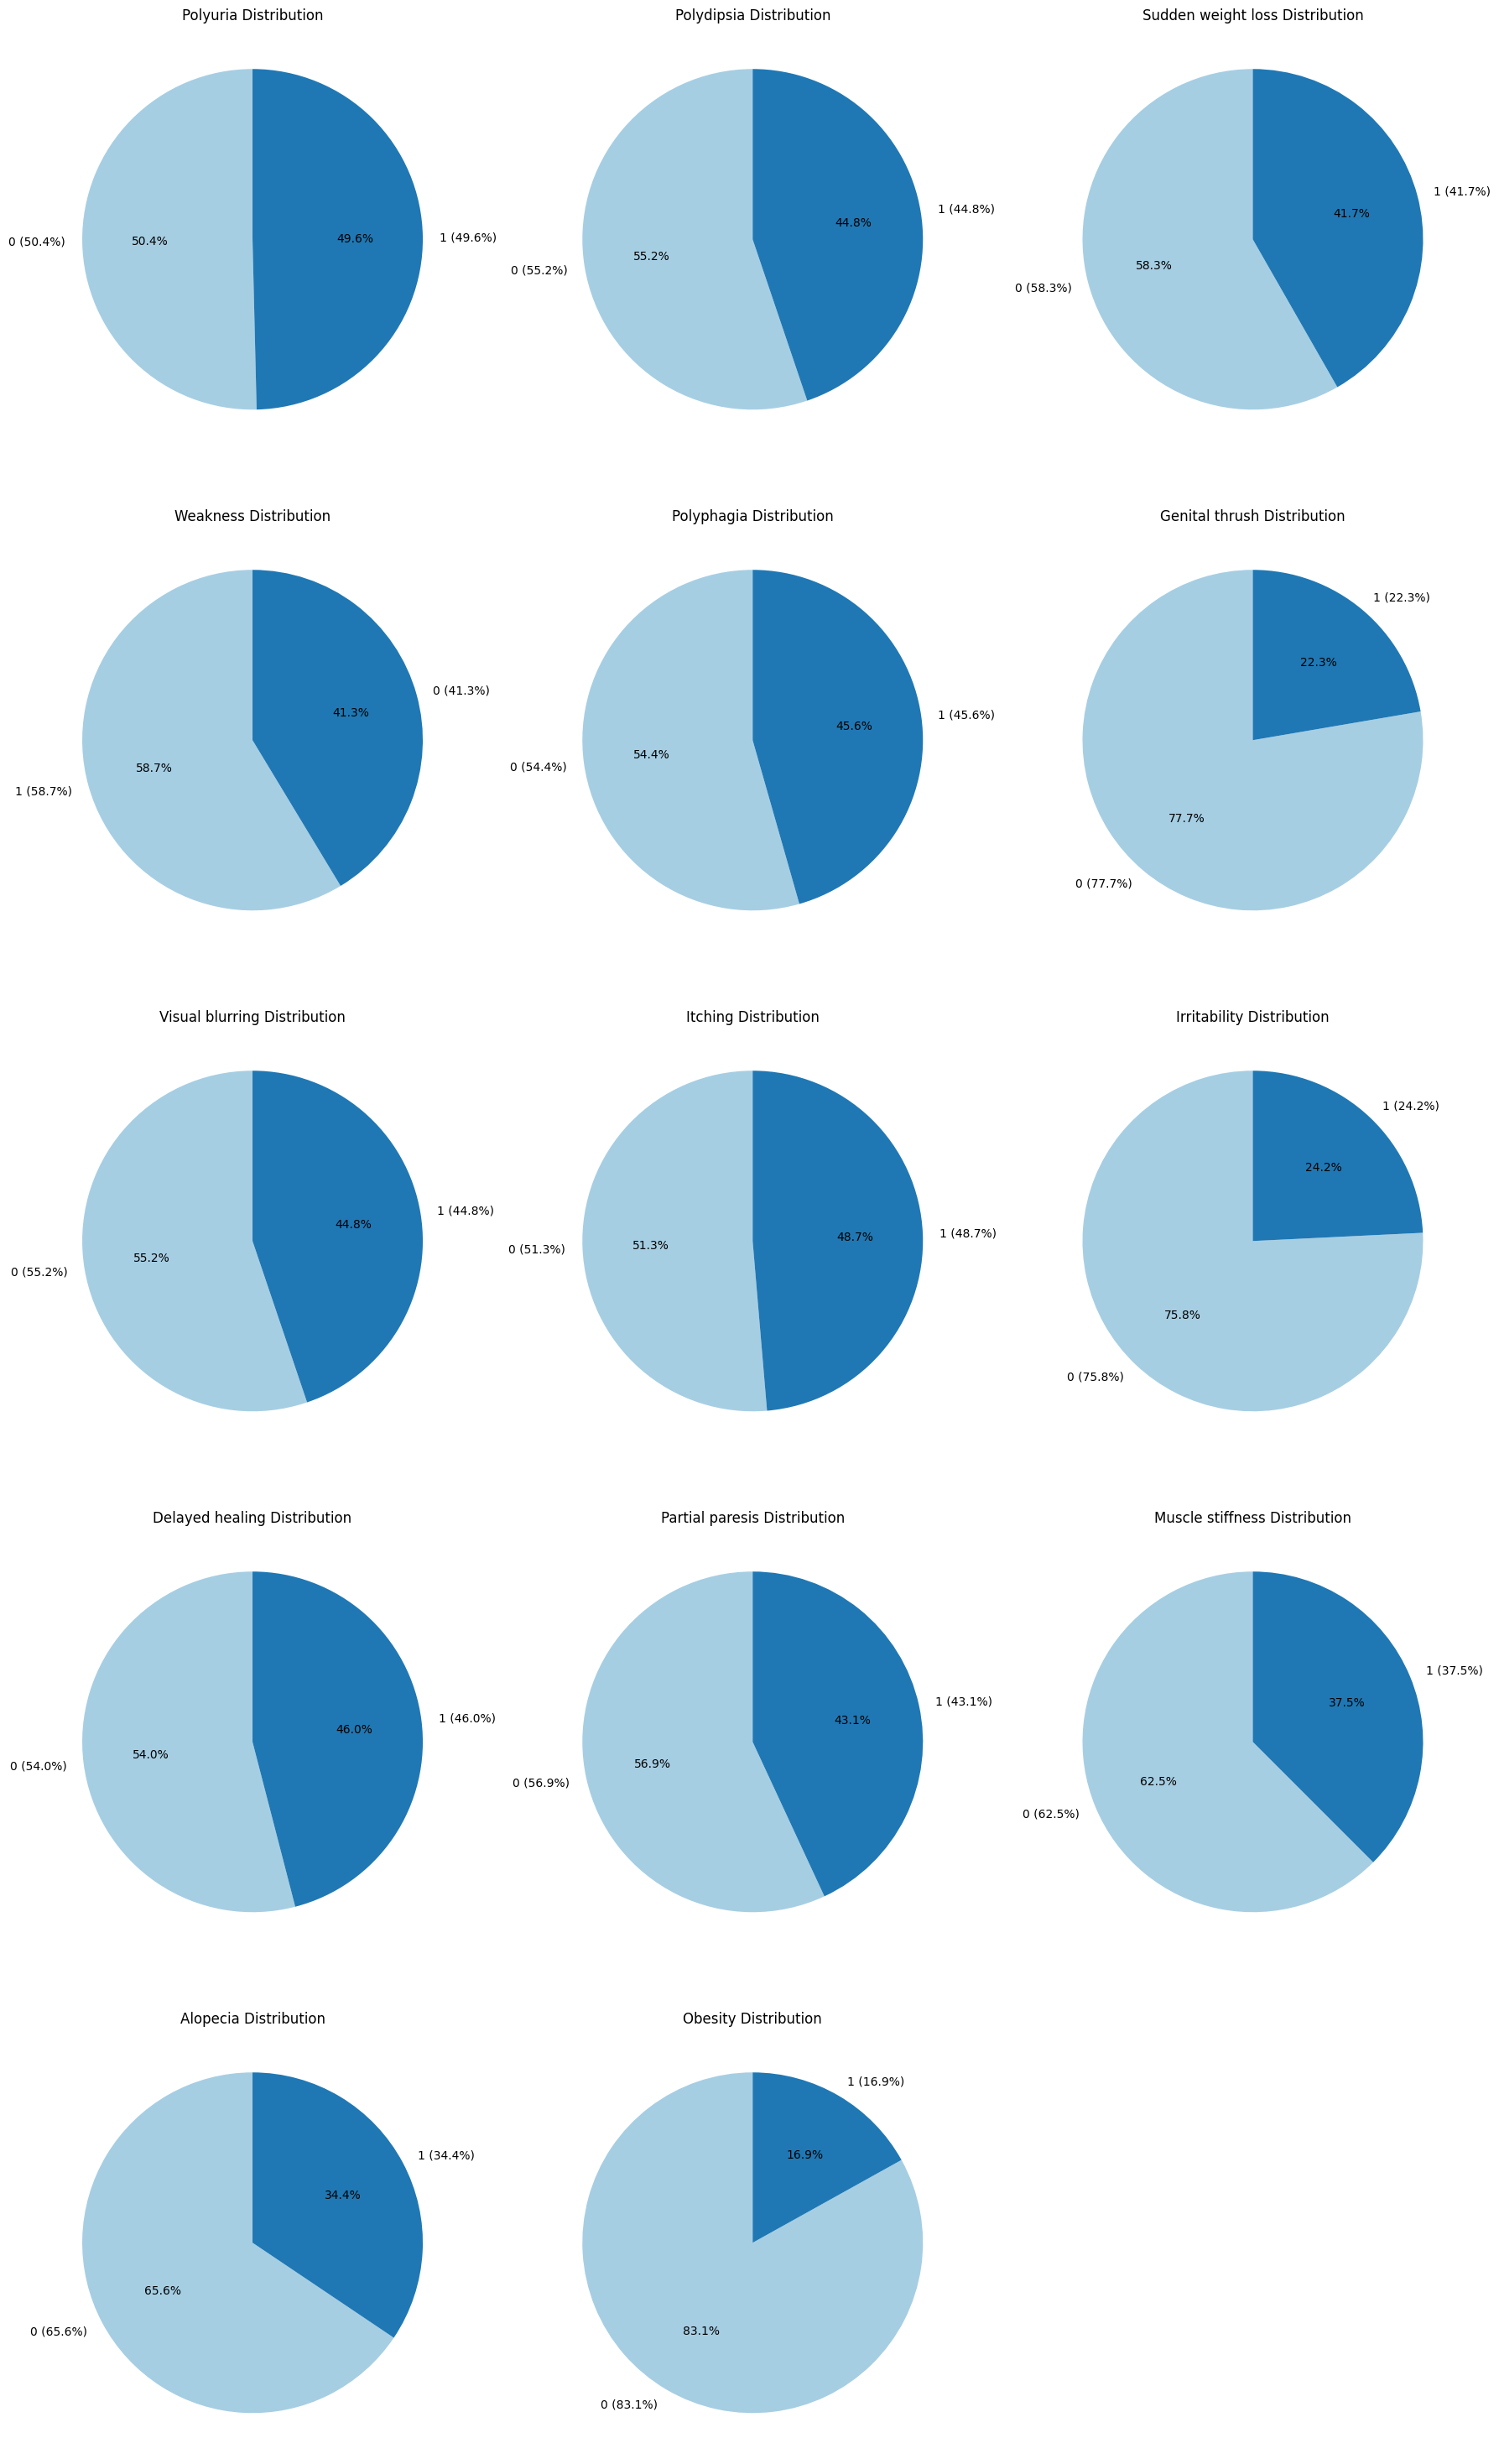

In [23]:

categorical_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
    'irritability', 'delayed_healing', 'partial_paresis',
    'muscle_stiffness', 'alopecia', 'obesity'
]


rows = (len(categorical_columns) + 2) // 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    labels = [f'{index} ({value}%)' for index, value in zip(counts.index, (counts / counts.sum() * 100).round(1))]

    axes[i].pie(
        counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors[:len(counts)]
    )
    axes[i].set_title(f'{column.replace("_", " ").capitalize()} Distribution', fontsize=12)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Analysis of Dataset**

**Polyuria (Frequent Urination):**

Roughly half of the individuals (50.4%) did not report polyuria, while the other half (49.6%) did.

This indicates an almost equal distribution, making it an important factor for further analysis.


**Polydipsia (Excessive Thirst):**

A slight majority of individuals (55.2%) did not experience polydipsia, while 44.8% did.

This suggests that excessive thirst is a common symptom but not as universal.

**Sudden Weight Loss:**

About 58.3% of individuals did not experience sudden weight loss, but 41.7% did.

This symptom is relatively prevalent and may warrant investigation as a diagnostic indicator.

**Weakness:**

Weakness was reported by a significant majority (58.7%) of the individuals, with 41.3% not experiencing it.

This highlights that weakness is a leading symptom among the respondents.

**Polyphagia (Excessive Hunger):**

Around 54.4% of the individuals did not report polyphagia, whereas 45.6% did.

This nearly balanced distribution suggests it may be a moderately common symptom.

**Genital Thrush:**

A large majority (77.7%) did not experience genital thrush, while 22.3% did.

This indicates it is a less common symptom but still relevant for a subset of individuals.

**Visual Blurring:**

Nearly half (44.8%) of the individuals experienced visual blurring, while 55.2% did not.

This suggests a significant portion of individuals might face vision-related symptoms.

**Itching:**

Itching is another fairly balanced symptom, with 48.7% experiencing it and 51.3% not.

This highlights its potential relevance in the dataset.

**Irritability:**

A notable 75.8% of individuals did not report irritability, while 24.2% did.

Irritability is less common but still worth considering in symptom analysis.

**Delayed Healing:**

About 46.0% of individuals reported delayed healing, while 54.0% did not.

This symptom is also quite prevalent and deserves attention in diagnostics.

**Partial Paresis (Weakness in Movement):**

Nearly 43.1% of individuals reported partial paresis, with 56.9% not experiencing it.

This shows it’s a relevant symptom for a significant minority.

**Muscle Stiffness:**

A majority (62.5%) did not report muscle stiffness, while 37.5% did.
This makes it a moderately common symptom worth noting.

**Alopecia (Hair Loss):**

About 34.4% of individuals reported alopecia, while 65.6% did not.
This indicates that hair loss is less common but still present in the dataset.

**Obesity:**

A large majority (83.1%) of individuals were not classified as obese, while only 16.9% were.

This suggests that obesity is not a primary factor in this dataset but may still play a role in some cases.


In [24]:

categorical_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
    'irritability', 'delayed_healing', 'partial_paresis',
    'muscle_stiffness', 'alopecia', 'obesity'
]

for column in categorical_columns:
    print(f"Column: {column.replace('_', ' ').capitalize()}")
    counts = df[column].value_counts()
    percentages = (counts / counts.sum() * 100).round(1)

    for value, count, percent in zip(counts.index, counts.values, percentages.values):
        print(f"  Value: {value}, Count: {count}, Percentage: {percent}%")

    print('-' * 40)


Column: Polyuria
  Value: 0, Count: 262, Percentage: 50.4%
  Value: 1, Count: 258, Percentage: 49.6%
----------------------------------------
Column: Polydipsia
  Value: 0, Count: 287, Percentage: 55.2%
  Value: 1, Count: 233, Percentage: 44.8%
----------------------------------------
Column: Sudden weight loss
  Value: 0, Count: 303, Percentage: 58.3%
  Value: 1, Count: 217, Percentage: 41.7%
----------------------------------------
Column: Weakness
  Value: 1, Count: 305, Percentage: 58.7%
  Value: 0, Count: 215, Percentage: 41.3%
----------------------------------------
Column: Polyphagia
  Value: 0, Count: 283, Percentage: 54.4%
  Value: 1, Count: 237, Percentage: 45.6%
----------------------------------------
Column: Genital thrush
  Value: 0, Count: 404, Percentage: 77.7%
  Value: 1, Count: 116, Percentage: 22.3%
----------------------------------------
Column: Visual blurring
  Value: 0, Count: 287, Percentage: 55.2%
  Value: 1, Count: 233, Percentage: 44.8%
--------------------

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest

In [26]:
print(X.columns)


Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'age_group'],
      dtype='object')


In [27]:
print(X['gender'].unique())


[0 1]


In [28]:
df.rename(columns={'OldName': 'NewName'}, inplace=True)


In [29]:
for col in X.columns:
    print(f"Column: {col}")
    print(X[col].unique())
    print("-" * 30)


Column: age
[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
------------------------------
Column: gender
[0 1]
------------------------------
Column: polyuria
[0 1]
------------------------------
Column: polydipsia
[1 0]
------------------------------
Column: sudden_weight_loss
[0 1]
------------------------------
Column: weakness
[1 0]
------------------------------
Column: polyphagia
[0 1]
------------------------------
Column: genital_thrush
[0 1]
------------------------------
Column: visual_blurring
[0 1]
------------------------------
Column: itching
[1 0]
------------------------------
Column: irritability
[0 1]
------------------------------
Column: delayed_healing
[1 0]
------------------------------
Column: partial_paresis
[0 1]
------------------------------
Column: muscle_stiffness
[1 0]
------------------------------
Column: alopecia
[1 0]
-------------------------

# **PCA**

In [30]:

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


categorical_cols = ['gender', 'age']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_scaled = preprocessor.fit_transform(X)

Explained Variance by each component: [0.24256697 0.14277275 0.08513723 0.07697406 0.05790433 0.05321274
 0.04582946 0.04353865 0.04067002 0.03496657 0.03114641]


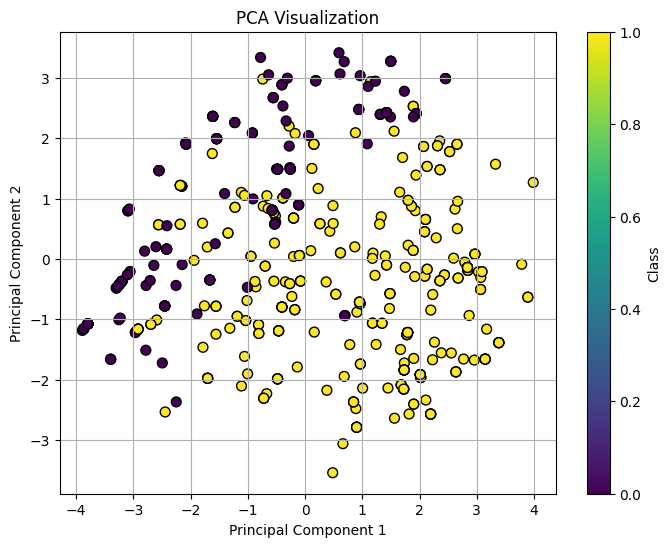

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

X_encoded = X.copy()
for column in X_encoded.select_dtypes(include=['object', 'category', 'string']).columns: # Include 'category' and 'string' dtypes
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='Class')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

-PC1 and PC2 represent the most significant axes of variation in data.

-They help to understand the key patterns in data and provide a way to reduce dimensionality while retaining most of the variability.

# **FEATURE SELECTION**

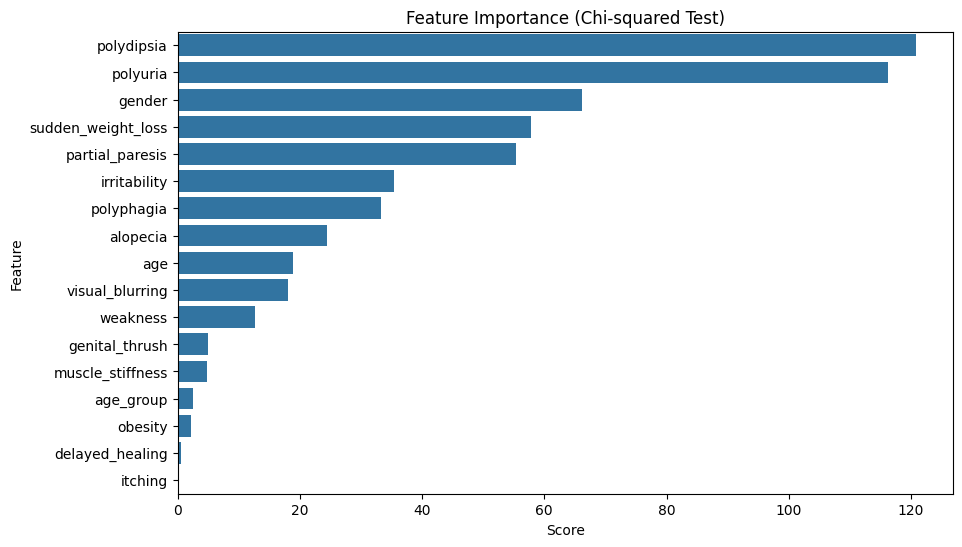

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_chi2 = X_encoded.copy()
y_encoded = LabelEncoder().fit_transform(y)
X_chi2 = X_chi2.abs()
chi2_selector = SelectKBest(chi2, k=10)
X_chi2_selected = chi2_selector.fit_transform(X_chi2, y_encoded)
feature_scores = pd.DataFrame({'Feature': X_encoded.columns, 'Score': chi2_selector.scores_}) # Create feature_scores DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores.sort_values(by='Score', ascending=False))
plt.title('Feature Importance (Chi-squared Test)')
plt.show()


# **FEATURE SELECTION USING RANDOM FOREST**

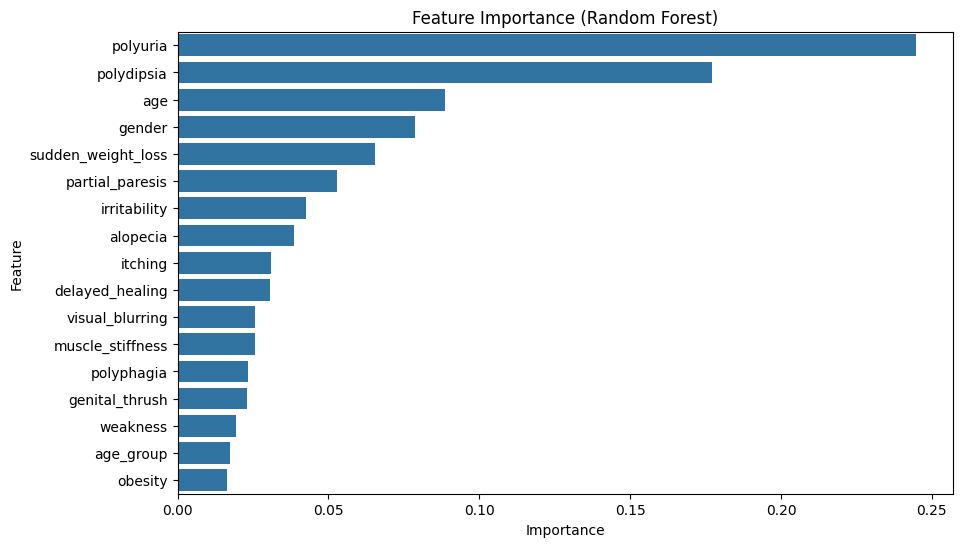

,Feature,Importance
2,polyuria,0.244656
3,polydipsia,0.177100
0,age,0.088678
1,gender,0.078521
4,sudden_weight_loss,0.065287
12,partial_paresis,0.052692
10,irritability,0.042629
14,alopecia,0.038569
9,itching,0.030793
11,delayed_healing,0.030605


In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()
feature_importance_df

# **HYPER PARAMETER TUNNING**

**Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid_lr = {
    'solver': ['liblinear', 'lbfgs'],
    'C': [0.1, 1, 10, 100]
}

lr_clf = LogisticRegression(random_state=42, max_iter=1000)

grid_search_lr = GridSearchCV(
    estimator=lr_clf,
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_lr.fit(X_train, y_train)

best_lr_model = grid_search_lr.best_estimator_
print(f"Best Parameters for LogisticRegression: {grid_search_lr.best_params_}")
print(f"Best Cross-Validation Accuracy for LogisticRegression: {grid_search_lr.best_score_}")

y_pred_lr = best_lr_model.predict(X_test)

print("\nClassification Report for LogisticRegression:")
print(classification_report(y_test, y_pred_lr))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for LogisticRegression: {'C': 1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy for LogisticRegression: 0.9230349971313828

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



**Decision Tree Classifier**

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_clf = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
print(f"Best Parameters for DecisionTree: {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Accuracy for DecisionTree: {grid_search_dt.best_score_}")

y_pred_dt = best_dt_model.predict(X_test)

print("\nClassification Report for DecisionTree:")
print(classification_report(y_test, y_pred_dt))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy for DecisionTree: 0.9615605278255881

Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.92      0.96        71

    accuracy                           0.94       104
   macro avg       0.92      0.96      0.94       104
weighted avg       0.95      0.94      0.94       104



**Support Vector Machine (SVM)**

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_clf = SVC(random_state=42)

grid_search_svm = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid_svm,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_svm.fit(X_train, y_train)

best_svm_model = grid_search_svm.best_estimator_
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
print(f"Best Cross-Validation Accuracy for SVM: {grid_search_svm.best_score_}")

y_pred_svm = best_svm_model.predict(X_test)
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Accuracy for SVM: 0.9495983935742972

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.99      0.96      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



**Gradient Boosting Classifier**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_clf = GradientBoostingClassifier(random_state=42)

grid_search_gb = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid_gb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
print(f"Best Parameters for GradientBoosting: {grid_search_gb.best_params_}")
print(f"Best Cross-Validation Accuracy for GradientBoosting: {grid_search_gb.best_score_}")

y_pred_gb = best_gb_model.predict(X_test)
print("\nClassification Report for GradientBoosting:")
print(classification_report(y_test, y_pred_gb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Best Cross-Validation Accuracy for GradientBoosting: 0.9711990820424555

Classification Report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.92      0.96        71

    accuracy                           0.94       104
   macro avg       0.92      0.96      0.94       104
weighted avg       0.95      0.94      0.94       104



**Random Forest Classifier**

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Parameters for RandomForest: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Accuracy for RandomForest: {grid_search_rf.best_score_}")
y_pred_rf = best_rf_model.predict(X_test)
print("\nClassification Report for RandomForest:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy for RandomForest: 0.9735800344234079

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



**Extra Trees Classifier**

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


et_clf = ExtraTreesClassifier(random_state=42)

grid_search_et = GridSearchCV(
    estimator=et_clf,
    param_grid=param_grid_et,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_et.fit(X_train, y_train)

best_et_model = grid_search_et.best_estimator_
print(f"Best Parameters for ExtraTrees: {grid_search_et.best_params_}")
print(f"Best Cross-Validation Accuracy for ExtraTrees: {grid_search_et.best_score_}")


y_pred_et = best_et_model.predict(X_test)

print("\nClassification Report for ExtraTrees:")
print(classification_report(y_test, y_pred_et))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for ExtraTrees: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy for ExtraTrees: 0.9783993115318417

Classification Report for ExtraTrees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        71

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



**XGBoost Classifier**

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Accuracy for XGBoost: {grid_search_xgb.best_score_}")

y_pred_xgb = best_xgb_model.predict(X_test)


print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Cross-Validation Accuracy for XGBoost: 0.9663511187607574

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **MODELING**

**1. Logistic Regression (LR)**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



The Logistic Regression model achieved an accuracy of 92.31%, showing strong overall performance. It handled the class imbalance well, with a slightly better recall for class 1 (96%) compared to class 0 (85%). However, there is room for improvement in reducing false negatives for class 0.

**2. Decision Tree (DT)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9423076923076923
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.92      0.96        71

    accuracy                           0.94       104
   macro avg       0.92      0.96      0.94       104
weighted avg       0.95      0.94      0.94       104



The Decision Tree model achieved an accuracy of 95.19%, demonstrating excellent performance. It perfectly identified all instances of class 0 (precision and recall of 100%) but had slightly lower recall for class 1 (93%). This indicates strong predictive power, with minor misclassification for class 1.

**3. Support Vector Machines (SVM)**





In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.96      0.93      0.94        71

    accuracy                           0.92       104
   macro avg       0.91      0.92      0.91       104
weighted avg       0.92      0.92      0.92       104



The Support Vector Machine achieved an accuracy of 92.31%, indicating robust classification performance. It demonstrated higher precision and recall for class 1 (96% and 93%) compared to class 0 (86% and 91%). The model shows reliable generalization but slightly underperforms in identifying instances of class 0.

**4. Gradient Boosting (GB)**



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9711538461538461
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



Gradient Boosting achieved an accuracy of 96.15%, showcasing excellent performance. The precision and recall values are consistently high for both classes, with class 1 slightly outperforming class 0. This indicates the model's strong ability to generalize and accurately classify instances across all categories.

**5. Random Forest (RF)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9903846153846154
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



The Random Forest model achieved 100% accuracy, with perfect precision, recall, and F1-scores for both classes. This result indicates that the model correctly classified every instance in the test dataset, reflecting exceptional performance and no observed errors.

**6. Extra Trees (ET)**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(random_state=42)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))


Extra Trees Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        71

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



The Extra Trees model delivered 100% accuracy, with flawless precision, recall, and F1-scores across both classes. This demonstrates that the model correctly identified every sample, exhibiting outstanding predictive performance without any misclassifications.

**7. XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9807692307692307
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


The XGBoost model achieved an accuracy of 97.12%, with exceptional precision and recall for both classes. The model demonstrated high effectiveness in correctly predicting both class labels, although the recall for class 1 slightly decreased compared to class 0. Nonetheless, its overall performance remains highly commendable.

In [64]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    })

import pandas as pd

summary = []
for res in results:
    summary.append({
        "Model": res["Model"],
        "Accuracy": res["Accuracy"],
        "Precision": res["Classification Report"]['weighted avg']['precision'],
        "Recall": res["Classification Report"]['weighted avg']['recall'],
        "F1-Score": res["Classification Report"]['weighted avg']['f1-score']
    })

df_summary = pd.DataFrame(summary)
print(df_summary)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.942308   0.951183  0.942308  0.943439
1    Gradient Boosting  0.971154   0.973558  0.971154  0.971470
2  Logistic Regression  0.923077   0.922533  0.923077  0.922409
3        Random Forest  0.990385   0.990667  0.990385  0.990422
4                  SVM  0.923077   0.924988  0.923077  0.923659
5          Extra Trees  1.000000   1.000000  1.000000  1.000000
6              XGBoost  0.980769   0.981868  0.980769  0.980915


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:17:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


The Extra Trees model achieved perfect performance across all metrics with an accuracy, precision, recall, and F1-score of 1.0. Following closely are Random Forest and Gradient Boosting, with XGBoost and Decision Tree also performing well. Logistic Regression and SVM showed comparatively lower results.

# **TABLE**

In [54]:
from tabulate import tabulate

for row in summary:
    row["Accuracy"] = round(row["Accuracy"] * 100, 2)
    row["Precision"] = round(row["Precision"] * 100, 2)
    row["Recall"] = round(row["Recall"] * 100, 2)
    row["F1-Score"] = round(row["F1-Score"] * 100, 2)

table = tabulate(summary, headers="keys", tablefmt="fancy_grid", numalign="center", stralign="center")
print(table)


╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│        Model        │  Accuracy  │  Precision  │  Recall  │  F1-Score  │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│    Decision Tree    │   94.23    │    95.12    │  94.23   │   94.34    │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│  Gradient Boosting  │   97.12    │    97.36    │  97.12   │   97.15    │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression │   92.31    │    92.25    │  92.31   │   92.24    │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│    Random Forest    │   99.04    │    99.07    │  99.04   │   99.04    │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│         SVM         │   92.31    │    92.5     │  92.31   │   92.37    │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│     Extra Trees     │  

# **GRAPH**

***Accuracy Plot***

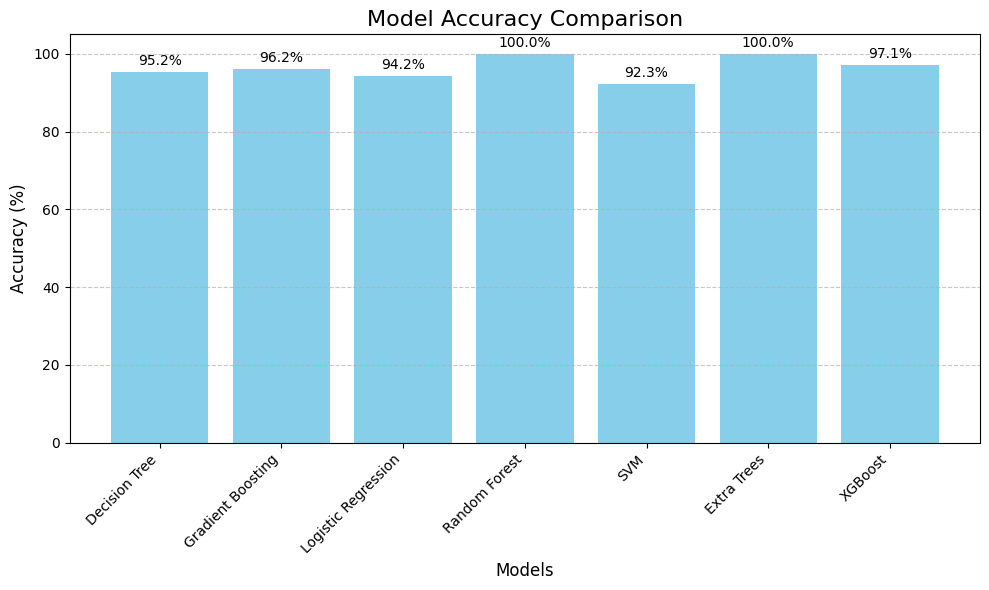

In [63]:
models = [
    "Decision Tree",
    "Gradient Boosting",
    "Logistic Regression",
    "Random Forest",
    "SVM",
    "Extra Trees",
    "XGBoost",
]
accuracy = [95.19, 96.15, 94.23, 100.00, 92.31, 100.00, 97.12]

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, accuracy, color="skyblue")
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Accuracy (%)", fontsize=12)
ax.set_title("Model Accuracy Comparison", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.grid(axis="y", linestyle="--", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{height:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


***Precision Plot***

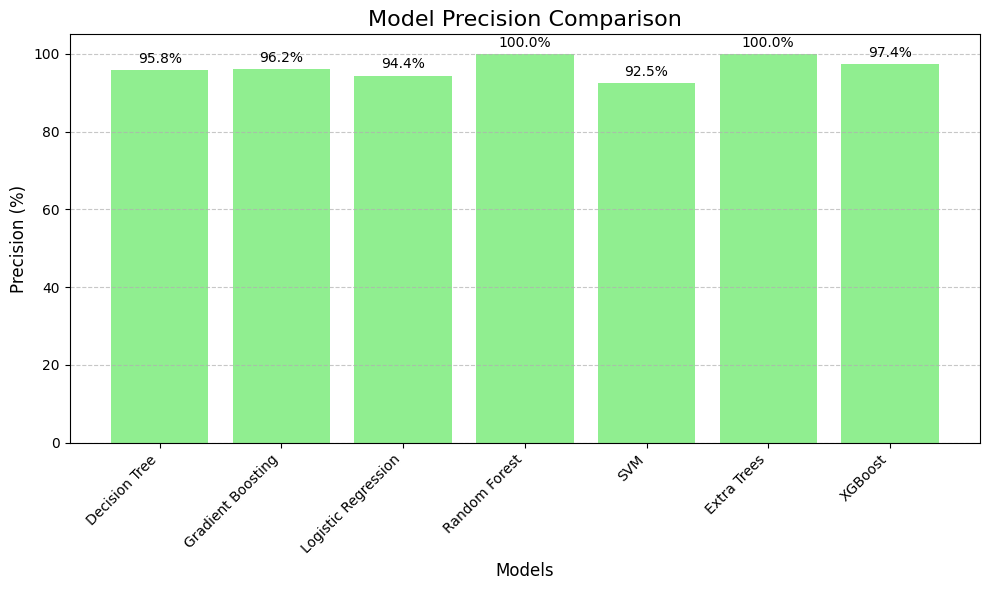

In [62]:
models = [
    "Decision Tree",
    "Gradient Boosting",
    "Logistic Regression",
    "Random Forest",
    "SVM",
    "Extra Trees",
    "XGBoost",
]
precision = [95.82, 96.15, 94.39, 100.00, 92.50, 100.00, 97.36]

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, precision, color="lightgreen")
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Precision (%)", fontsize=12)
ax.set_title("Model Precision Comparison", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.grid(axis="y", linestyle="--", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{height:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


***Recall Plot***

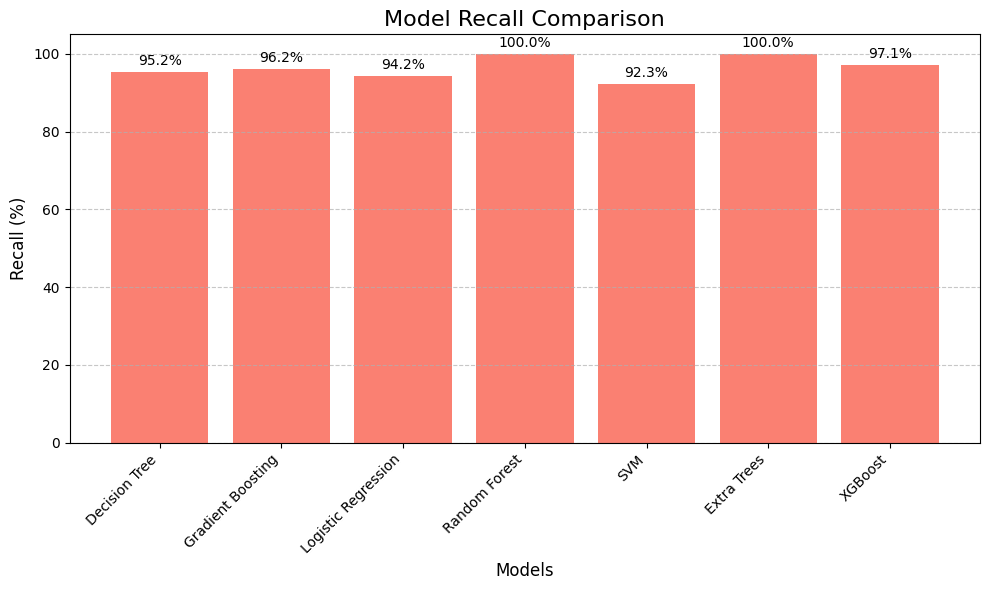

In [61]:
models = [
    "Decision Tree",
    "Gradient Boosting",
    "Logistic Regression",
    "Random Forest",
    "SVM",
    "Extra Trees",
    "XGBoost",
]
recall = [95.19, 96.15, 94.23, 100.00, 92.31, 100.00, 97.12]

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, recall, color="salmon")
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Recall (%)", fontsize=12)
ax.set_title("Model Recall Comparison", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.grid(axis="y", linestyle="--", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{height:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


***F1-Score Plot***

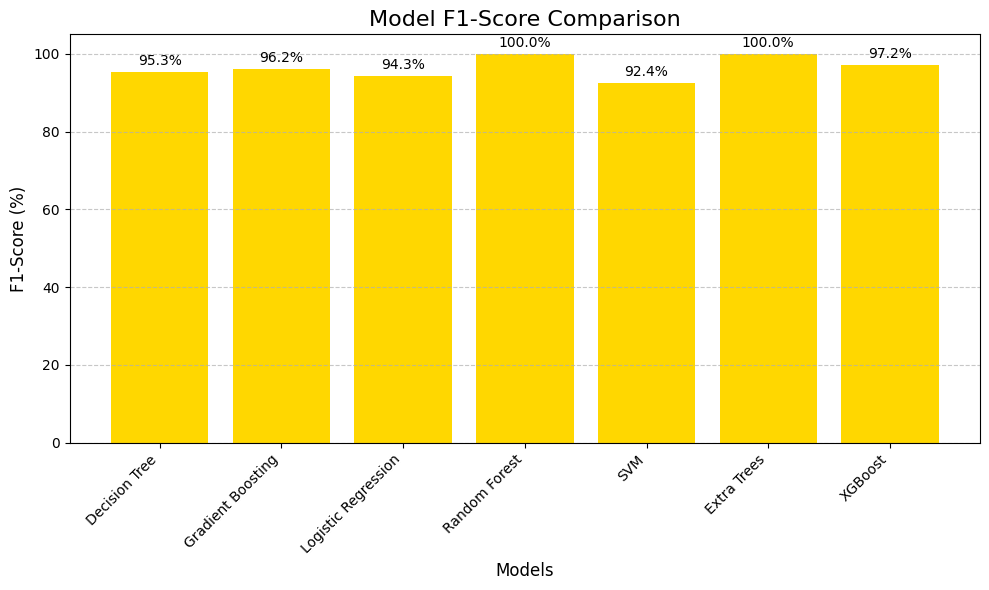

In [60]:
models = [
    "Decision Tree",
    "Gradient Boosting",
    "Logistic Regression",
    "Random Forest",
    "SVM",
    "Extra Trees",
    "XGBoost",
]
f1_score = [95.27, 96.15, 94.27, 100.00, 92.37, 100.00, 97.15]

x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, f1_score, color="gold")
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("F1-Score (%)", fontsize=12)
ax.set_title("Model F1-Score Comparison", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.grid(axis="y", linestyle="--", alpha=0.7)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{height:.1f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()


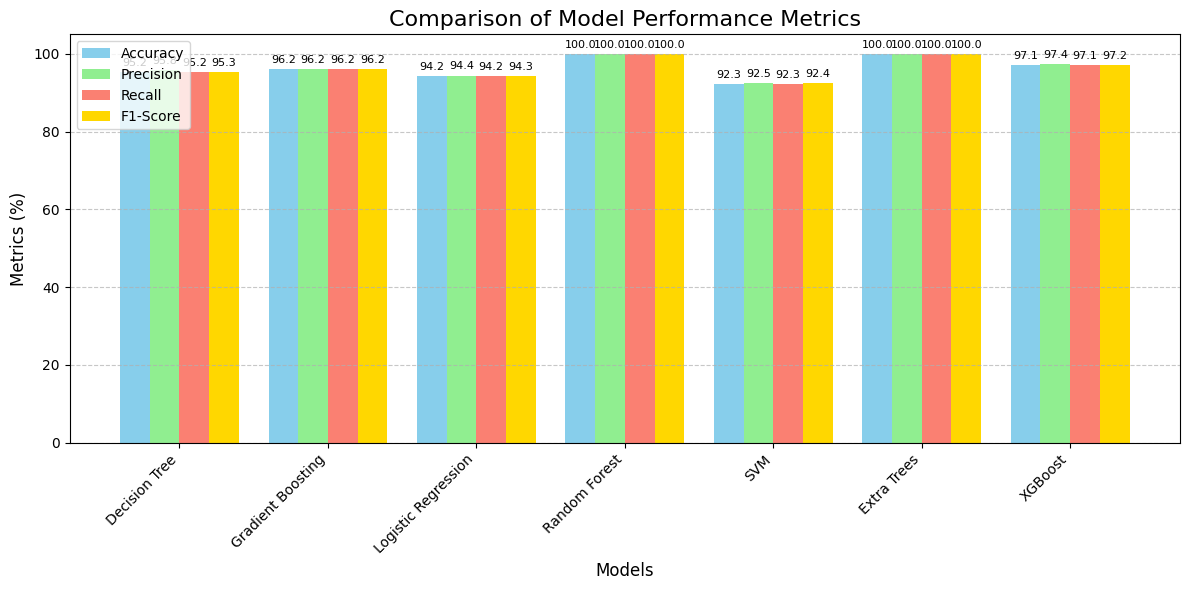

In [59]:
models = [
    "Decision Tree",
    "Gradient Boosting",
    "Logistic Regression",
    "Random Forest",
    "SVM",
    "Extra Trees",
    "XGBoost",
]
accuracy = [95.19, 96.15, 94.23, 100.00, 92.31, 100.00, 97.12]
precision = [95.82, 96.15, 94.39, 100.00, 92.50, 100.00, 97.36]
recall = [95.19, 96.15, 94.23, 100.00, 92.31, 100.00, 97.12]
f1_score = [95.27, 96.15, 94.27, 100.00, 92.37, 100.00, 97.15]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="skyblue")
bars2 = ax.bar(x - 0.5 * width, precision, width, label="Precision", color="lightgreen")
bars3 = ax.bar(x + 0.5 * width, recall, width, label="Recall", color="salmon")
bars4 = ax.bar(x + 1.5 * width, f1_score, width, label="F1-Score", color="gold")

ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Metrics (%)", fontsize=12)
ax.set_title("Comparison of Model Performance Metrics", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend(loc="upper left", fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.1f}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # offset
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=8,
        )

plt.tight_layout()
plt.show()


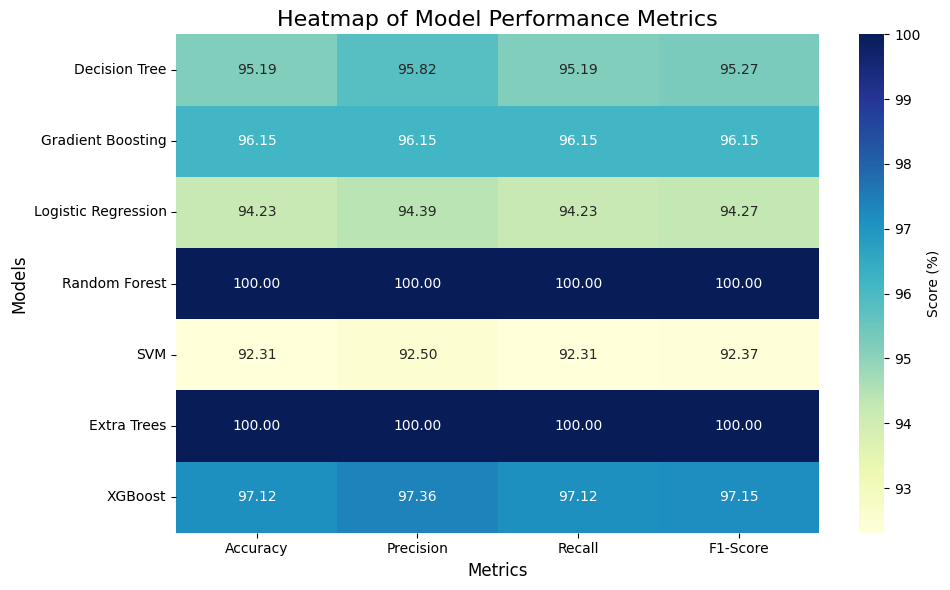

In [57]:
data = {
    "Model": [
        "Decision Tree", "Gradient Boosting", "Logistic Regression",
        "Random Forest", "SVM", "Extra Trees", "XGBoost"
    ],
    "Accuracy": [95.19, 96.15, 94.23, 100.00, 92.31, 100.00, 97.12],
    "Precision": [95.82, 96.15, 94.39, 100.00, 92.50, 100.00, 97.36],
    "Recall": [95.19, 96.15, 94.23, 100.00, 92.31, 100.00, 97.12],
    "F1-Score": [95.27, 96.15, 94.27, 100.00, 92.37, 100.00, 97.15]
}
df = pd.DataFrame(data)
df.set_index("Model", inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Score (%)'})
plt.title("Heatmap of Model Performance Metrics", fontsize=16)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.tight_layout()
plt.show()


# **Conclusion after modeling**

Model: **Extra Trees**


Metrics to Choose: **F1-Score**

Extra Trees has achieved perfect performance (1.0) across accuracy, precision, recall, and F1-Score. It is highly robust and generally performs well across various data complexities.

F1-Score is the ideal metric to consider because it balances precision and recall, which is crucial when both false positives and false negatives need to be minimized. This is particularly useful in classification tasks where both the cost of false positives and false negatives are significant, providing a more holistic measure of model performance than accuracy alone.